c:\Users\pbodh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


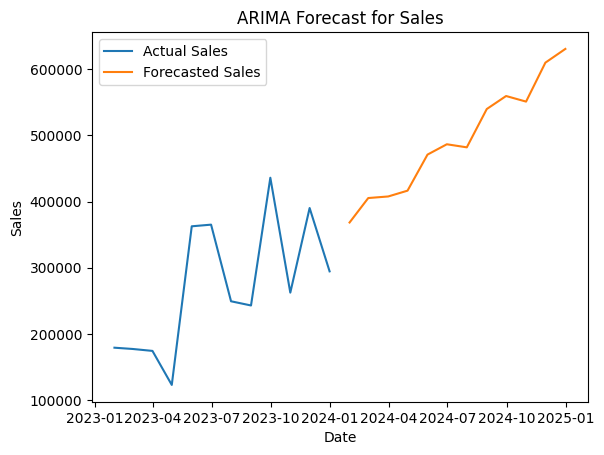

Forecasted Sales for Next Year:
2024-01-31    368333.624750
2024-02-29    405314.888617
2024-03-31    407700.058970
2024-04-30    416485.479234
2024-05-31    471009.857882
2024-06-30    486629.244293
2024-07-31    481989.899217
2024-08-31    539917.917002
2024-09-30    559585.788336
2024-10-31    551145.790863
2024-11-30    610046.663329
2024-12-31    630803.927396
Freq: M, Name: predicted_mean, dtype: float64


In [26]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Define your sales data
sales_data = [179018.86, 177120.88, 174173.55, 122734.36, 362590.35, 365079.62, 
              249214.28, 242866.21, 436012.52, 262280.29, 390223.58, 294466.47]

# df = pd.DataFrame(sales_data)
# df.plot()

# Create a pandas Series with a datetime index (assuming monthly data)
sales_series = pd.Series(sales_data, index=pd.date_range(start='2023-01', periods=12, freq='M'))

# Fit ARIMA model
# model = ARIMA(sales_series, order=(1,1,1))  # Example order, you can adjust based on analysis
model = ARIMA(sales_series, order=(1,1,1), seasonal_order=(1,1,1,3))  
fit_model = model.fit()

# Forecast future sales (next year)
forecast = fit_model.forecast(steps=12)  # Forecasting for next 12 months

# Convert forecast to pandas Series
forecast_series = pd.Series(forecast, index=pd.date_range(start='2024-01', periods=12, freq='M'))

# Plot original data and forecast
plt.plot(sales_series, label='Actual Sales')
plt.plot(forecast_series, label='Forecasted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('ARIMA Forecast for Sales')
plt.legend()
plt.show()

print("Forecasted Sales for Next Year:")
print(forecast_series)


In [27]:
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(sales_data)

In [28]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis,indicating it is non-stationary ")

adfuller_test(sales_data)

ADF Test Statistic : -2.447845464239609
p-value : 0.12868503254009406
#Lags Used : 3
Number of Observations : 8
weak evidence against null hypothesis,indicating it is non-stationary 


In [29]:
sales_data_1 = []
for i in range (0,len(sales_data)-1):
    sales_data_1.append(sales_data[i+1] - sales_data[i])

print(sales_data_1)

[-1897.9799999999814, -2947.3300000000163, -51439.18999999999, 239855.99, 2489.2700000000186, -115865.34, -6348.070000000007, 193146.31000000003, -173732.23000000004, 127943.29000000004, -95757.11000000004]


In [30]:

adfuller_test(sales_data_1)

ADF Test Statistic : -3.5121050037309076
p-value : 0.007681600085148611
#Lags Used : 2
Number of Observations : 8
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


<Axes: >

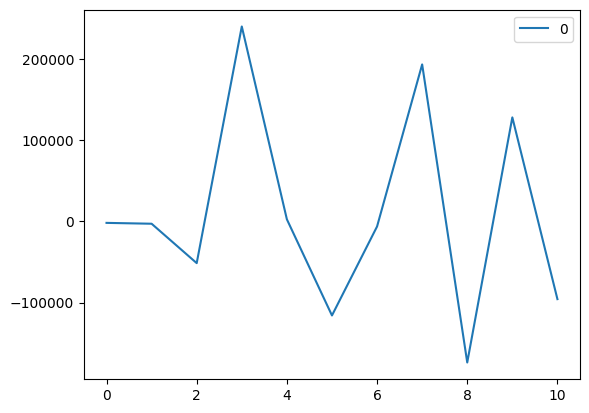

In [31]:
df = pd.DataFrame(sales_data_1)
df.plot()

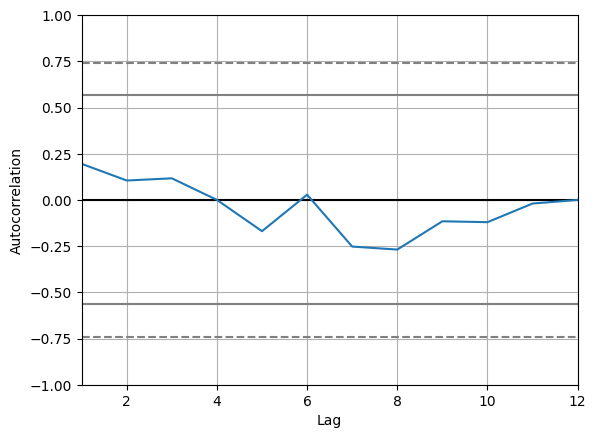

In [32]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(sales_data)
plt.show()

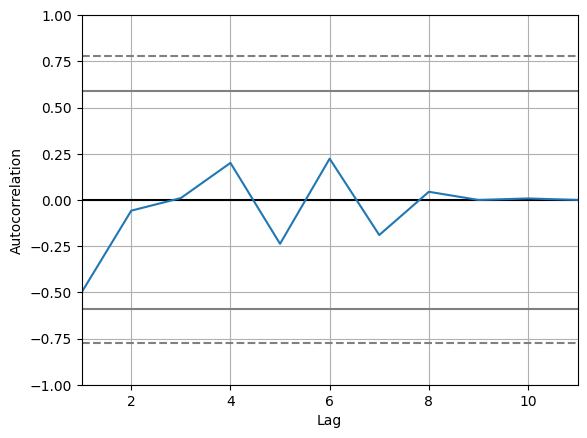

In [33]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(sales_data_1)
plt.show()

In [34]:
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
sales_series_1 = pd.Series(sales_data, index=pd.date_range(start='2023-01', periods=12, freq='M'))
# model1=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
model1 = ARIMA(sales_series_1, order=(1,1,1), seasonal_order=(1,1,1,12))  
model_fit1 = model1.fit()
model_fit1.summary()

c:\Users\pbodh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\pbodh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\pbodh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tools\eval_measures.py:415: RuntimeWarning: invalid value encountered in log
  return -2.0 * llf + np.log(nobs) * df_modelwc
c:\Users\pbodh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tools\eval_measures.py:440: RuntimeWarning: invalid valu

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                                y   No. Observations:                   12
Model:             ARIMA(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                   0.000
Date:                          Thu, 07 Mar 2024   AIC                             10.000
Time:                                  17:36:07   BIC                                nan
Sample:                              01-31-2023   HQIC                               nan
                                   - 12-31-2023                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1               0         -0        nan        nan           0           0
ma.L1               0         -0        nan        nan           0           0
ar.S.L12            0         -0        nan        nan           0           0
ma.S.L12            0         -0        nan        nan           0           0
sigma2         1.0000         -0       -inf      0.000       1.000       1.000
===================================================================================
Ljung-Box (L1) (Q):                    nan   Jarque-Bera (JB):                  nan
Prob(Q):                               nan   Prob(JB):                          nan
Heteroskedasticity (H):                nan   Skew:                              nan
Prob(H) (two-sided):                   nan   Kurtosis:                          nan
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

In [47]:
forecast_series_1 = model_fit1.forecast(steps=12)
print('$$$$$$$$$$$$$$$$$$$$')
print(forecast_series_1)
print('$$$$$$$$$$$$$$$$$$$$')
forecast_series_1 = pd.Series(forecast_series_1, index= pd.date_range(start = '2024-01', periods= 12,freq= 'M'))
final_df = pd.DataFrame(sales_series_1)
final_df['forecast_series_1'] = forecast_series_1
print(final_df)

$$$$$$$$$$$$$$$$$$$$
2024-01-31    383975.944755
2024-02-29    382077.964755
2024-03-31    379130.634755
2024-04-30    327691.444755
2024-05-31    567547.434755
2024-06-30    570036.704755
2024-07-31    454171.364755
2024-08-31    447823.294755
2024-09-30    640969.604755
2024-10-31    467237.374755
2024-11-30    595180.664755
2024-12-31    499423.554755
Freq: M, Name: predicted_mean, dtype: float64
$$$$$$$$$$$$$$$$$$$$
                    0  forecast_series_1
2023-01-31  179018.86                NaN
2023-02-28  177120.88                NaN
2023-03-31  174173.55                NaN
2023-04-30  122734.36                NaN
2023-05-31  362590.35                NaN
2023-06-30  365079.62                NaN
2023-07-31  249214.28                NaN
2023-08-31  242866.21                NaN
2023-09-30  436012.52                NaN
2023-10-31  262280.29                NaN
2023-11-30  390223.58                NaN
2023-12-31  294466.47                NaN


In [45]:
final_df.rename(columns={0:'sales_series_1'},inplace=True)

In [46]:
final_df

,sales_series_1,forecast_series_1
2023-01-31,179018.86,NaN
2023-02-28,177120.88,NaN
2023-03-31,174173.55,NaN
2023-04-30,122734.36,NaN
2023-05-31,362590.35,NaN
2023-06-30,365079.62,NaN
2023-07-31,249214.28,NaN
2023-08-31,242866.21,NaN
2023-09-30,436012.52,NaN
2023-10-31,262280.29,NaN


In [38]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

future_datest_df.tail()

future_df=pd.concat([df,future_datest_df])

future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)
future_df[['Sales', 'forecast']].plot(figsize=(12, 8))

TypeError: unsupported operand type(s) for +: 'int' and 'DateOffset'